<a href="https://colab.research.google.com/github/RaidelBC/Trabajo_Final/blob/main/trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

In [1]:
!git clone "https://github.com/RaidelBC/Trabajo_Final"

Cloning into 'Trabajo_Final'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
data = pd.read_excel("/content/Trabajo_Final/Notas.xlsx")

data.head(10)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Relación de notas por preuniversitario,NaN,NaN,NaN,NaN,NaN,NaN
1,Convocatoria: Ordinaria,NaN,NaN,NaN,NaN,NaN,NaN
2,Examen: Español,NaN,NaN,NaN,NaN,NaN,NaN
3,Preuniversitario: CAIB IPU RUBÉN MARTÍNE...,NaN,NaN,NaN,NaN,NaN,NaN
4,Vía de ingreso: Institutos Preuniversit...,NaN,NaN,NaN,NaN,NaN,NaN
5,Carné de identidad,Apellidos y nombre(s),Calificación,Carné de identidad,Calificación,Carné de identidad,Calificación
6,1090171824,ABREUT HERRADA RICARDO,60.5,1090171824,53,1090171824,71.5
7,1042671773,ACOSTA GONZÁLEZ ERIKA,89.5,1042671773,39,1042671773,72.5
8,1031371776,ADAY DÍAZ ANABEL,90,1031371776,73,1031371776,62.5
9,1091271774,AGUILAR SANCHEZ DAYSEL,79,1091271774,23,1091271774,62


In [ ]:
#se cambian los nombres de las columnas 
data.rename(columns={"Unnamed: 0":"CI","Unnamed: 2":"Espanol","Unnamed: 1":"Name","Unnamed: 4":"Matematica","Unnamed: 6":"Historia" ,"Unnamed: 3":"CI_1","Unnamed: 5":"CI_2"},inplace=True)
data.head(90)

,CI,Name,Espanol,CI_1,Matematica,CI_2,Historia
0,Relación de notas por preuniversitario,NaN,NaN,NaN,NaN,NaN,NaN
1,Convocatoria: Ordinaria,NaN,NaN,NaN,NaN,NaN,NaN
2,Examen: Español,NaN,NaN,NaN,NaN,NaN,NaN
3,Preuniversitario: CAIB IPU RUBÉN MARTÍNE...,NaN,NaN,NaN,NaN,NaN,NaN
4,Vía de ingreso: Institutos Preuniversit...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
85,1073170750,REYES PAZ DACHELY ESTHER,93.5,1073170750,69,1073170750,62
86,1122374336,RODRÍGUEZ LASTRES THAILY,82,1122374336,65,1122374336,93
87,1011471768,RODRÍGUEZ PANTALEÓN ALEJANDRO,90,1011471768,69,1011471768,87.5
88,1120971776,RODRÍGUEZ VERGEL KEILY,Aus,1120971776,Aus,1120971776,Aus


In [ ]:
#lista de las posiciones de los nombre de los pre
indices_escuelas=[v for v in range(12686) if str(data["CI"][v]).split(": ")[0]=="Preuniversitario"]


In [ ]:
def mes(a):
    meses={1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",6:"Junio",7:"Julio",8:"Agosto",9:"Septiembre",10:"Octubre",11:"Noviembre",12:"Diciembre"}
    p=int(str(a)[2]+str(a)[3])
    return meses[int(p)]

def dia(a):
    dia=int(str(a)[4]+str(a)[5])
    return dia


In [ ]:
#rectificar el numero de cifras del CI
def rectificar(i):
    cad=str(i)
    while len(cad)!=11:
        cad="0"+cad
    return cad
     

In [ ]:
zonas_municipales={"SCL":1,"CIF":2,"RAN":2,"CAM":2,"PLA":2,"MAN":2,"REM":3,'CAIB':3,"ENC":3,"SAG":3,"SDG":3,"QdG":4,"COR":5,"SlG":3,"PLAC":2,"QUEM":4,"SC":1,"SD":3,'':0,}
municipios=["SCL","CIF","RAN","CAM","PLA","MAN","REM","CAIB","ENC","SAG","SDG","QdG","COR","SlG","PLAC","QUEM","SC","SD"]
#centros_entrada={'IPU':7,'CM':7,'COLEGIO':8,'CONCURSO-UCLV':6,'EIDE':9,'ETP':9,'IPVCE':6,'PRE':7,'SMVF':8,'CONCURSO-ISA':6,"O-18":8,'ORDEN':8,'CONCURSO':6}

In [ ]:
def municipio(i):
  h=[v for v in i if v in municipios]
  return h

In [ ]:
#crea una lista con los nombre de los pre, los nombres de los estudiantes  etc, y organiza los datos de las notas de cada estudiantes.
data_lis=[]
for i in data["CI"]:
    if list(data["CI"]).index(i) in indices_escuelas:
        pos=list(data["CI"]).index(i)
        name_escuela=(str(data['CI'][pos]).split(":")[1].strip()).split()
        f=municipio(name_escuela)
        if name_escuela[0] not in municipios:
           tipo_escuela=name_escuela[0]    
        else:
          tipo_escuela,*nombre_escuela=name_escuela[1:]
          via_ingreso=str(data["CI"][pos+1]).split(":")[1].strip()
          
    for j in data["CI_1"]:
            if i==j and type(i)== int:
                for k in data["CI_2"]:
                    if  i==k :
                        name=data['Name'][list(data["CI"]).index(i)]
                        nota_mat=data['Matematica'][list(data["CI_1"]).index(j)]
                        nota_esp=data['Espanol'][list(data["CI"]).index(i)]
                        nota_his=data['Historia'][list(data["CI_2"]).index(k)]
                        data_lis.append([rectificar(i),dia(rectificar(i)),mes(rectificar(i)),name,"".join(f),tipo_escuela," ".join(nombre_escuela),via_ingreso,nota_mat,nota_esp,nota_his])

In [ ]:
#crea una nueva tabla 
df = pd.DataFrame(data_lis)


In [ ]:
#se cambian los nombres de las columnas 
df.rename(columns={0:"CI",1:"Dia",2:"Mes",3:"Nombre",4:"Municipio",5:"Centro",6:"Nombre del Pre",7:"Via de Ingreso",8:"Espanol",9:"Matematica",10:"Historia"},inplace=True)
df

,CI,Dia,Mes,Nombre,Municipio,Centro,Nombre del Pre,Via de Ingreso,Espanol,Matematica,Historia
0,01090171824,1,Septiembre,ABREUT HERRADA RICARDO,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,53,60.5,71.5
1,01042671773,26,Abril,ACOSTA GONZÁLEZ ERIKA,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,39,89.5,72.5
2,01031371776,13,Marzo,ADAY DÍAZ ANABEL,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,73,90,62.5
3,01091271774,12,Septiembre,AGUILAR SANCHEZ DAYSEL,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,23,79,62
4,01103171826,31,Octubre,ALFONSO CANTO ENMANUEL CAMILO,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,46,77.5,71
...,...,...,...,...,...,...,...,...,...,...,...
8520,03102760719,27,Octubre,Santana Gómez Cinthya Amalia,SAG,IPU,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,39,71.5,94
8521,03122971932,29,Diciembre,Suárez Duque Sheila María,SAG,IPU,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,93,87,91
8522,02111670485,16,Noviembre,VELÁZQUEZ ACOSTA ANDY ERNESTO,SAG,IPU,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,61,85.5,74.5
8523,03061965139,19,Junio,Verdecia Hernández Yenisbel,SAG,IPU,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,67,66.5,81


In [ ]:
#realiza un copia del dataframe 
dfd = df.copy()
dfd

,CI,Dia,Mes,Nombre,Municipio,Centro,Nombre del Pre,Via de Ingreso,Espanol,Matematica,Historia
0,01090171824,1,Septiembre,ABREUT HERRADA RICARDO,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,53,60.5,71.5
1,01042671773,26,Abril,ACOSTA GONZÁLEZ ERIKA,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,39,89.5,72.5
2,01031371776,13,Marzo,ADAY DÍAZ ANABEL,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,73,90,62.5
3,01091271774,12,Septiembre,AGUILAR SANCHEZ DAYSEL,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,23,79,62
4,01103171826,31,Octubre,ALFONSO CANTO ENMANUEL CAMILO,CAIB,IPU,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,46,77.5,71
...,...,...,...,...,...,...,...,...,...,...,...
8520,03102760719,27,Octubre,Santana Gómez Cinthya Amalia,SAG,IPU,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,39,71.5,94
8521,03122971932,29,Diciembre,Suárez Duque Sheila María,SAG,IPU,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,93,87,91
8522,02111670485,16,Noviembre,VELÁZQUEZ ACOSTA ANDY ERNESTO,SAG,IPU,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,61,85.5,74.5
8523,03061965139,19,Junio,Verdecia Hernández Yenisbel,SAG,IPU,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,67,66.5,81


In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#dfd["Municipio"]= ordinal_encoder.fit_transform(dfd[["Municipio"]])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
dfd["Centro"]= ordinal_encoder.fit_transform(dfd[["Centro"]])

In [ ]:
dfd

,CI,Dia,Mes,Nombre,Municipio,Centro,Nombre del Pre,Via de Ingreso,Espanol,Matematica,Historia
0,01090171824,1,Septiembre,ABREUT HERRADA RICARDO,CAIB,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,53,60.5,71.5
1,01042671773,26,Abril,ACOSTA GONZÁLEZ ERIKA,CAIB,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,39,89.5,72.5
2,01031371776,13,Marzo,ADAY DÍAZ ANABEL,CAIB,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,73,90,62.5
3,01091271774,12,Septiembre,AGUILAR SANCHEZ DAYSEL,CAIB,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,23,79,62
4,01103171826,31,Octubre,ALFONSO CANTO ENMANUEL CAMILO,CAIB,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,46,77.5,71
...,...,...,...,...,...,...,...,...,...,...,...
8520,03102760719,27,Octubre,Santana Gómez Cinthya Amalia,SAG,7.0,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,39,71.5,94
8521,03122971932,29,Diciembre,Suárez Duque Sheila María,SAG,7.0,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,93,87,91
8522,02111670485,16,Noviembre,VELÁZQUEZ ACOSTA ANDY ERNESTO,SAG,7.0,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,61,85.5,74.5
8523,03061965139,19,Junio,Verdecia Hernández Yenisbel,SAG,7.0,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,67,66.5,81


In [ ]:
 #a cada valor string se le asocia un valor numerico
pd.set_option('mode.chained_assignment','raise')
for v in dfd["Municipio"]:
   dfd.loc[list(dfd["Municipio"]).index(v),"Municipio"] = zonas_municipales[v] 

#pd.set_option('mode.chained_assignment','raise')
#for v in dfd["Centro"]:
 #  dfd.loc[list(dfd["Centro"]).index(v),"Centro"] = centros_entrada[v] 

In [ ]:
#limpieza de las columnas que no se van a utilizar, asi como las que tienen valores vacios
for x in dfd.index:
    if dfd.loc[x,"Espanol"] in ["Aus","Des"]  or dfd.loc[x,"Matematica"]  in ["Aus","Des"]   or dfd.loc[x,"Historia"] in ["Aus","Des"] :
        dfd.drop(x, inplace = True)
for x in dfd.index:
    if dfd.loc[x,"Espanol"] in ["Ren","Jus"]  or dfd.loc[x,"Matematica"]  in ["Ren","Jus"]   or dfd.loc[x,"Historia"] in ["Ren","Jus"] :
        dfd.drop(x, inplace = True)
for x in dfd.index:
    if dfd.loc[x,"Nombre del Pre"] in ["HÉCTOR RUIZ PÉREZ MININT","MARIANO CLEMENTE PRADO I MININT","MARIANO CLEMENTE PRADO MININT","OBDULIO MORALES MININT","ABEL SANTAMARÍA CUADRADO MININT","CAPITAN R RODRÍGUEZ MININT","EDUARDO R CHIBÁS MININT","NEPTHALÍ MARTÍNEZ MININT","OSVALDO HERRERA MININT","MININT","VICTORIA DE GIRÓN MININT","MIGUEL DE LA GUARDIA MININT","RUBÉN MARTÍNEZ VILLENA MININT","JOSÉ ANTONIO ECHEVERRIA MININT","EDUARDO RENE CHIBÁS MININT","CARLOS CHESALLE MININT"] :
        dfd.drop(x, inplace = True)
dfd = dfd.dropna()
dfd

,CI,Dia,Mes,Nombre,Municipio,Centro,Nombre del Pre,Via de Ingreso,Espanol,Matematica,Historia
0,01090171824,1,Septiembre,ABREUT HERRADA RICARDO,3,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,53,60.5,71.5
1,01042671773,26,Abril,ACOSTA GONZÁLEZ ERIKA,3,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,39,89.5,72.5
2,01031371776,13,Marzo,ADAY DÍAZ ANABEL,3,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,73,90,62.5
3,01091271774,12,Septiembre,AGUILAR SANCHEZ DAYSEL,3,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,23,79,62
4,01103171826,31,Octubre,ALFONSO CANTO ENMANUEL CAMILO,3,7.0,RUBÉN MARTÍNEZ VILLENA,Institutos Preuniversitarios,46,77.5,71
...,...,...,...,...,...,...,...,...,...,...,...
8520,03102760719,27,Octubre,Santana Gómez Cinthya Amalia,3,7.0,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,39,71.5,94
8521,03122971932,29,Diciembre,Suárez Duque Sheila María,3,7.0,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,93,87,91
8522,02111670485,16,Noviembre,VELÁZQUEZ ACOSTA ANDY ERNESTO,3,7.0,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,61,85.5,74.5
8523,03061965139,19,Junio,Verdecia Hernández Yenisbel,3,7.0,MIGUEL DIOSDADO PÉREZ PIMENTEL,Institutos Preuniversitarios,67,66.5,81


In [ ]:
dfd=dfd.astype({"Municipio":"float64","Centro":"float64","Matematica":"float64","Espanol":"float64","Historia":"float64"})

In [ ]:
#descripcion estadistica
from pandas import set_option
set_option('display.width', 100)
description = dfd.describe()
print(description)

               Dia    Municipio       Centro      Espanol   Matematica     Historia
count  8008.000000  8008.000000  8008.000000  8008.000000  8008.000000  8008.000000
mean     15.607268     1.241758     5.445055    66.070679    82.167695    75.209478
std       8.678009     1.227671     2.849671    24.601797    12.476786    22.307557
min       1.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       8.000000     0.000000     4.000000    49.000000    75.500000    62.000000
50%      15.000000     1.000000     7.000000    69.000000    84.500000    80.500000
75%      23.000000     2.000000     7.000000    87.000000    91.500000    94.000000
max      31.000000     5.000000    12.000000   100.000000   100.000000   100.000000


In [ ]:
#correlacion 
set_option('display.width', 100)
correlations = dfd.corr(method='pearson')
print(correlations)

                 Dia  Municipio    Centro   Espanol  Matematica  Historia
Dia         1.000000  -0.003103 -0.021728 -0.010967   -0.018282 -0.002350
Municipio  -0.003103   1.000000 -0.170341 -0.071858   -0.033827 -0.021402
Centro     -0.021728  -0.170341  1.000000 -0.061420   -0.013068 -0.002195
Espanol    -0.010967  -0.071858 -0.061420  1.000000    0.701829  0.715645
Matematica -0.018282  -0.033827 -0.013068  0.701829    1.000000  0.694853
Historia   -0.002350  -0.021402 -0.002195  0.715645    0.694853  1.000000


In [ ]:
#sesgo
skew = dfd.skew()
print(skew)

CI            4.558517
Dia           0.035511
Municipio     0.712559
Centro       -1.165048
Espanol      -0.528941
Matematica   -1.147345
Historia     -1.018160
dtype: float64


<ipython-input-24-30c5a1b26e92>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = dfd.skew()


In [ ]:
# me quedo con las columnas que me interezan
dataset = dfd[{"Nombre del Pre","Municipio","Centro","Espanol","Matematica","Historia","Dia"}]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8008 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Espanol         8008 non-null   float64
 1   Centro          8008 non-null   float64
 2   Matematica      8008 non-null   float64
 3   Historia        8008 non-null   float64
 4   Municipio       8008 non-null   float64
 5   Dia             8008 non-null   int64  
 6   Nombre del Pre  8008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 500.5+ KB


In [ ]:
dataset

,Espanol,Centro,Matematica,Historia,Municipio,Dia,Nombre del Pre
0,53.0,7.0,60.5,71.5,3.0,1,RUBÉN MARTÍNEZ VILLENA
1,39.0,7.0,89.5,72.5,3.0,26,RUBÉN MARTÍNEZ VILLENA
2,73.0,7.0,90.0,62.5,3.0,13,RUBÉN MARTÍNEZ VILLENA
3,23.0,7.0,79.0,62.0,3.0,12,RUBÉN MARTÍNEZ VILLENA
4,46.0,7.0,77.5,71.0,3.0,31,RUBÉN MARTÍNEZ VILLENA
...,...,...,...,...,...,...,...
8520,39.0,7.0,71.5,94.0,3.0,27,MIGUEL DIOSDADO PÉREZ PIMENTEL
8521,93.0,7.0,87.0,91.0,3.0,29,MIGUEL DIOSDADO PÉREZ PIMENTEL
8522,61.0,7.0,85.5,74.5,3.0,16,MIGUEL DIOSDADO PÉREZ PIMENTEL
8523,67.0,7.0,66.5,81.0,3.0,19,MIGUEL DIOSDADO PÉREZ PIMENTEL


In [ ]:
dataset['Nombre del Pre'].value_counts()

MIGUEL DIOSDADO PÉREZ PIMENTEL        3262
CAPITÁN ROBERTO RODRÍGUEZ              577
                                       480
MARIANO CLEMENTE PRADO                 375
JOSÉ MARTÍ PÉREZ                       296
MIGUEL DE LA GUARDIA                   296
EDUARDO RENÉ CHIBÁS                    281
OSVALDO HERRERA                        265
ABEL SANTAMARIA CUADRADO               262
REINALDO URQUIZA                       167
RUBÉN MARTÍNEZ VILLENA                 165
ANDRÉS CUEVAS HEREDIA                  131
CARLOS CHESSALLE RODRÍGUEZ             127
ERNESTO GUEVARA (UNIDAD 2)              98
HECTOR RUÍZ PÉREZ                       97
ERNESTO GUEVARA (UNIDAD 1)              94
EVELIO DANIEL VILLAVICENCIO             93
JUAN PEDRO CARBÓ SERVIÁ                 86
WILFREDO PÉREZ PÉREZ                    80
JOSÉ ANTONIO ECHEVERRÍA                 65
JULIO ANTONIO MELLA                     65
FÉLIX ALVAREZ SOTO                      64
CAMILO CIENFUEGOS                       64
ANTONIO DÍA

In [ ]:
dataset

,Espanol,Centro,Matematica,Historia,Municipio,Dia,Nombre del Pre
0,53.0,7.0,60.5,71.5,3.0,1,RUBÉN MARTÍNEZ VILLENA
1,39.0,7.0,89.5,72.5,3.0,26,RUBÉN MARTÍNEZ VILLENA
2,73.0,7.0,90.0,62.5,3.0,13,RUBÉN MARTÍNEZ VILLENA
3,23.0,7.0,79.0,62.0,3.0,12,RUBÉN MARTÍNEZ VILLENA
4,46.0,7.0,77.5,71.0,3.0,31,RUBÉN MARTÍNEZ VILLENA
...,...,...,...,...,...,...,...
8520,39.0,7.0,71.5,94.0,3.0,27,MIGUEL DIOSDADO PÉREZ PIMENTEL
8521,93.0,7.0,87.0,91.0,3.0,29,MIGUEL DIOSDADO PÉREZ PIMENTEL
8522,61.0,7.0,85.5,74.5,3.0,16,MIGUEL DIOSDADO PÉREZ PIMENTEL
8523,67.0,7.0,66.5,81.0,3.0,19,MIGUEL DIOSDADO PÉREZ PIMENTEL


In [ ]:
# se dividen los atributos predictores del atributo a predecir, y eliminemos los valores perdidos
X = dataset.loc[:,["Municipio","Dia","Centro","Historia","Matematica","Espanol"]]
y = dataset['Nombre del Pre']

In [ ]:
X

,Municipio,Dia,Centro,Historia,Matematica,Espanol
0,3.0,1,7.0,71.5,60.5,53.0
1,3.0,26,7.0,72.5,89.5,39.0
2,3.0,13,7.0,62.5,90.0,73.0
3,3.0,12,7.0,62.0,79.0,23.0
4,3.0,31,7.0,71.0,77.5,46.0
...,...,...,...,...,...,...
8520,3.0,27,7.0,94.0,71.5,39.0
8521,3.0,29,7.0,91.0,87.0,93.0
8522,3.0,16,7.0,74.5,85.5,61.0
8523,3.0,19,7.0,81.0,66.5,67.0


In [ ]:
#se dividen los datos los datos en dos partes, uno para entrenar y otro para estimar su calidad
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
train_idx, test_idx = next(sss.split(X, y))
X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

In [ ]:
X_train.merge(y_train, left_index=True, right_index=True)

,Municipio,Dia,Centro,Historia,Matematica,Espanol,Nombre del Pre
8104,1.0,24,7.0,35.0,61.0,27.0,MARIANO CLEMENTE PRADO
8287,1.0,29,7.0,99.0,99.0,97.0,OSVALDO HERRERA
7168,3.0,28,7.0,44.5,61.0,31.0,MIGUEL DIOSDADO PÉREZ PIMENTEL
5692,2.0,16,0.0,91.5,83.5,94.0,ANDRÉS CUEVAS HEREDIA
6213,0.0,8,8.0,97.0,82.0,82.0,MIGUEL DE LA GUARDIA
...,...,...,...,...,...,...,...
5620,3.0,6,7.0,99.0,97.0,95.0,RUBÉN MARTÍNEZ VILLENA
3653,0.0,8,7.0,48.5,81.0,30.0,MIGUEL DIOSDADO PÉREZ PIMENTEL
361,5.0,28,0.0,93.0,93.5,92.0,JULIO ANTONIO MELLA
6428,2.0,25,7.0,22.5,81.5,16.0,REINALDO URQUIZA


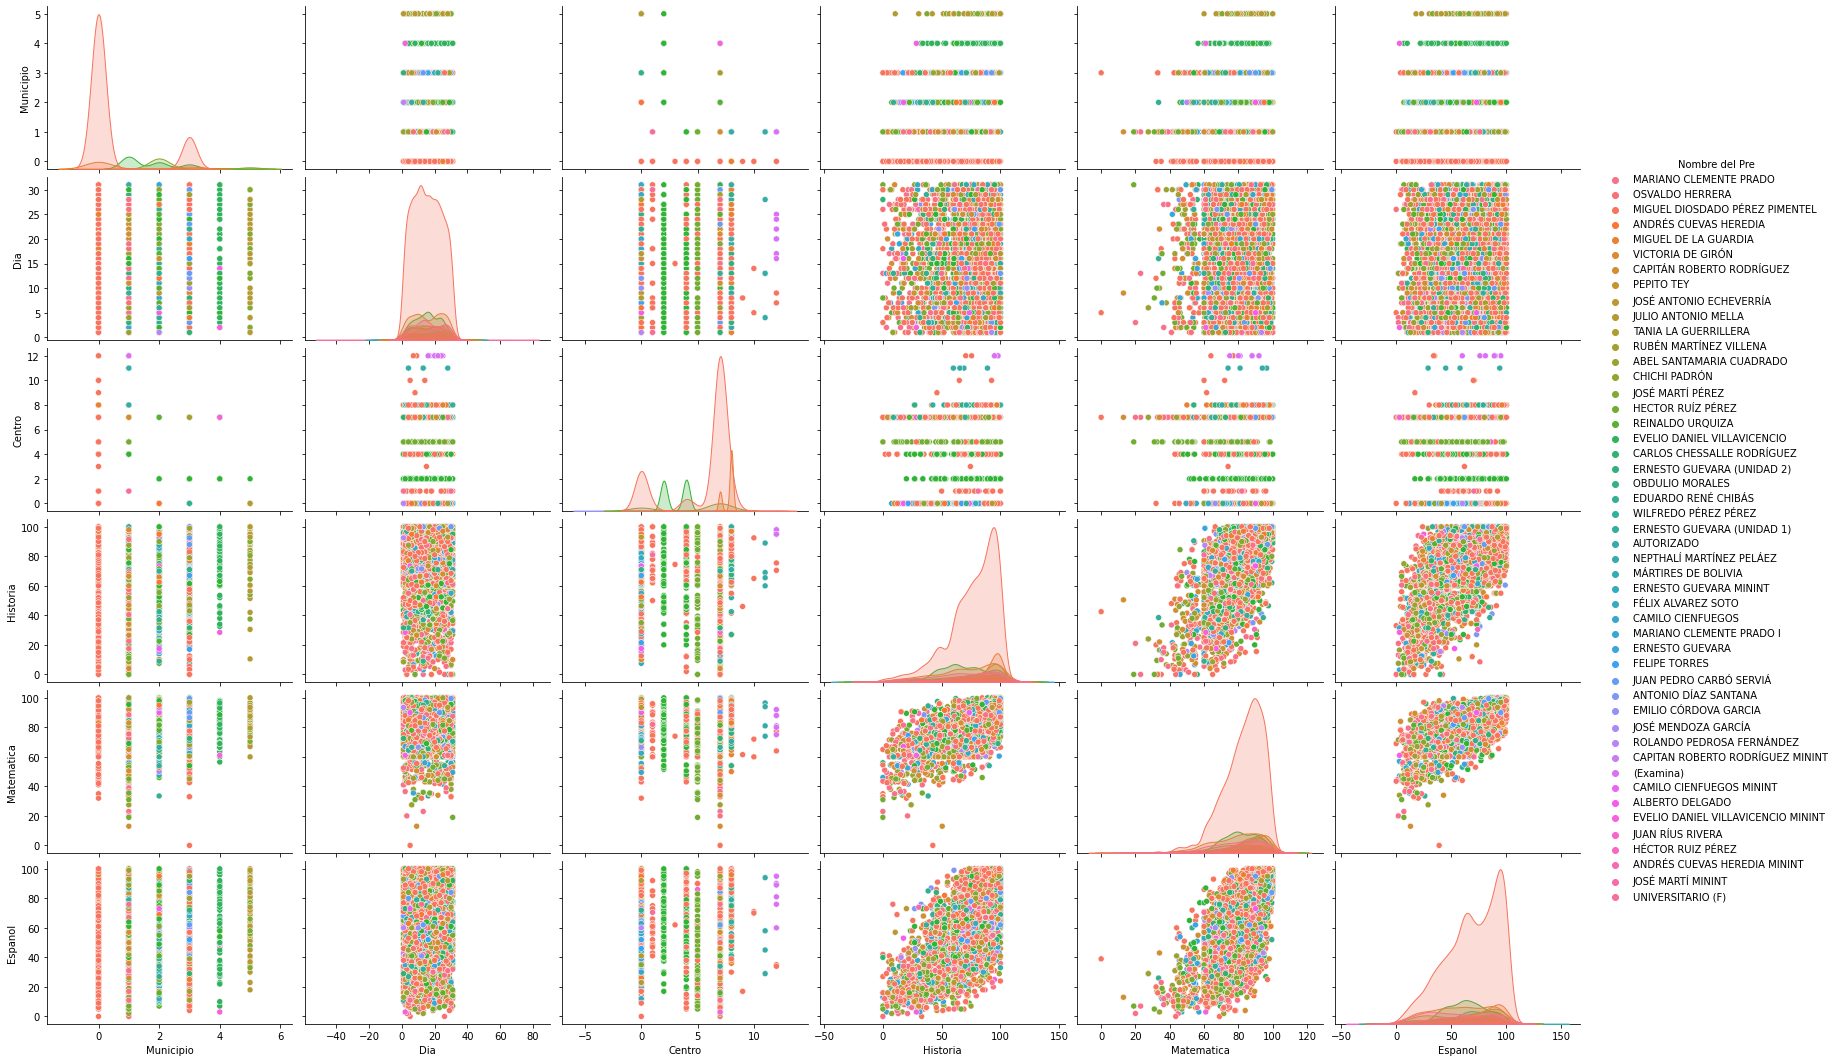

In [ ]:
# Veamos los pairplots
sn.pairplot(X_train.merge(y_train, left_index=True, right_index=True), hue='Nombre del Pre', aspect=1.5)
plt.show()

In [ ]:
#Entrenando ahora un clasificador de arboles de decisión
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state = 42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Evaluando el modelo construido
from sklearn import metrics
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.5472326258843113

In [ ]:
#matriz de confucion 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(clf.classes_)
conf_matrix

['' '(Examina)' 'ABEL SANTAMARIA CUADRADO' 'ALBERTO DELGADO'
 'ANDRÉS CUEVAS HEREDIA' 'ANDRÉS CUEVAS HEREDIA MININT'
 'ANTONIO DÍAZ SANTANA' 'AUTORIZADO' 'CAMILO CIENFUEGOS'
 'CAMILO CIENFUEGOS MININT' 'CAPITAN ROBERTO RODRÍGUEZ MININT'
 'CAPITÁN ROBERTO RODRÍGUEZ' 'CARLOS CHESSALLE RODRÍGUEZ' 'CHICHI PADRÓN'
 'EDUARDO RENÉ CHIBÁS' 'EMILIO CÓRDOVA GARCIA' 'ERNESTO GUEVARA'
 'ERNESTO GUEVARA (UNIDAD 1)' 'ERNESTO GUEVARA (UNIDAD 2)'
 'ERNESTO GUEVARA MININT' 'EVELIO DANIEL VILLAVICENCIO'
 'EVELIO DANIEL VILLAVICENCIO MININT' 'FELIPE TORRES' 'FÉLIX ALVAREZ SOTO'
 'HECTOR RUÍZ PÉREZ' 'HÉCTOR RUIZ PÉREZ' 'JOSÉ ANTONIO ECHEVERRÍA'
 'JOSÉ MARTÍ MININT' 'JOSÉ MARTÍ PÉREZ' 'JOSÉ MENDOZA GARCÍA'
 'JUAN PEDRO CARBÓ SERVIÁ' 'JUAN RÍUS RIVERA' 'JULIO ANTONIO MELLA'
 'MARIANO CLEMENTE PRADO' 'MARIANO CLEMENTE PRADO I'
 'MIGUEL DE LA GUARDIA' 'MIGUEL DIOSDADO PÉREZ PIMENTEL'
 'MÁRTIRES DE BOLIVIA' 'NEPTHALÍ MARTÍNEZ PELÁEZ' 'OBDULIO MORALES'
 'OSVALDO HERRERA' 'PEPITO TEY' 'REINALDO URQUIZA'
 'ROLAND

array([[69,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

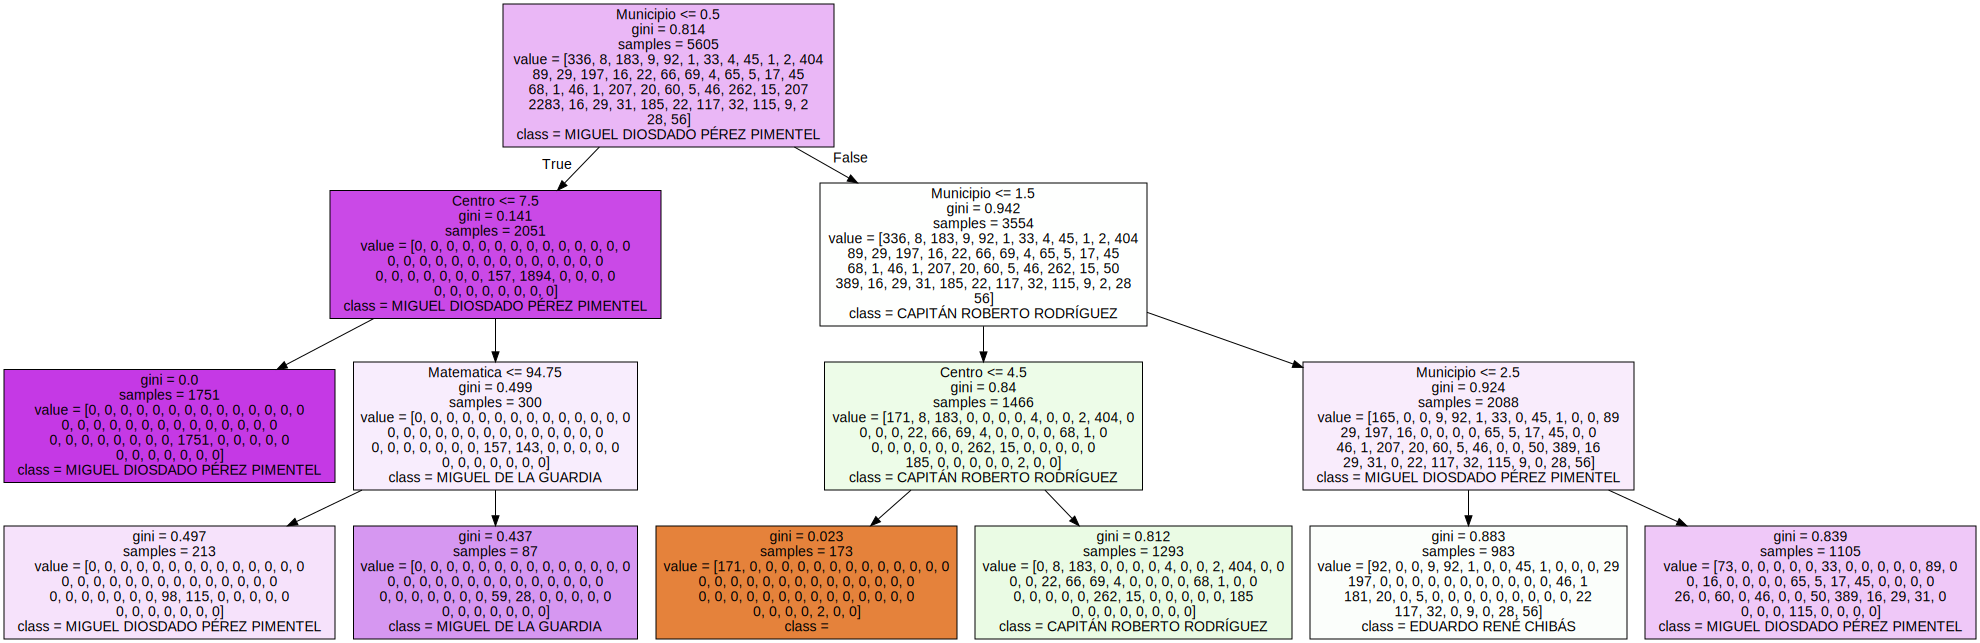

In [ ]:
# modelo construido
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=clf.classes_,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

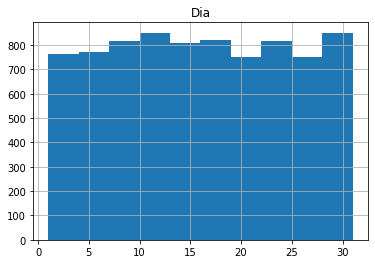

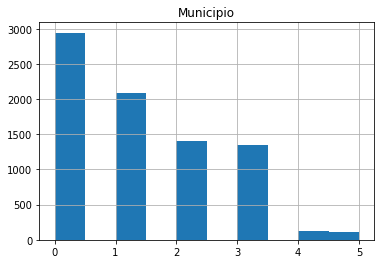

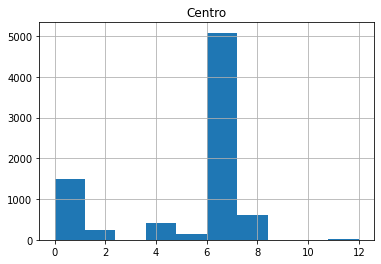

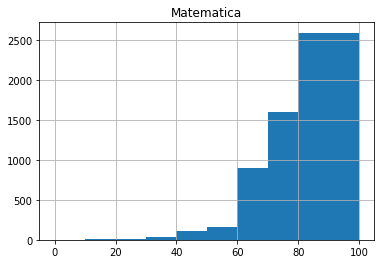

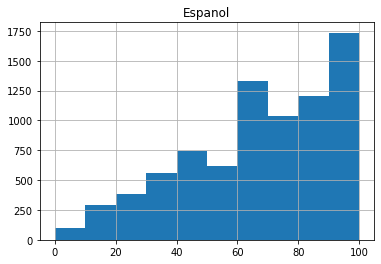

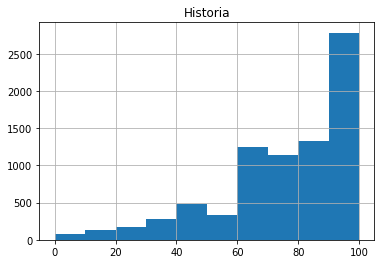

In [ ]:
l=["Dia","Municipio","Centro","Matematica","Espanol","Historia"]
for v in l:
    dfd.hist(v)
    plt.show()

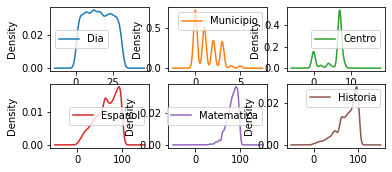

In [ ]:
# grafico de densidad 
dfd.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

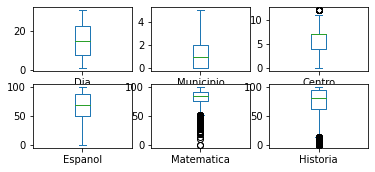

In [ ]:
#grafico de caja
dfd.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

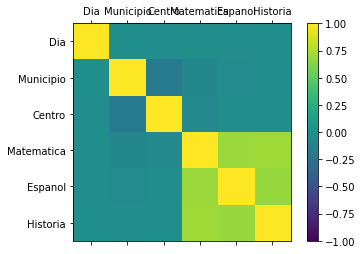

In [ ]:
correlations = dfd.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(["Dia","Municipio","Centro","Matematica","Espanol","Historia"])
ax.set_yticklabels(["Dia","Municipio","Centro","Matematica","Espanol","Historia"])
plt.show()

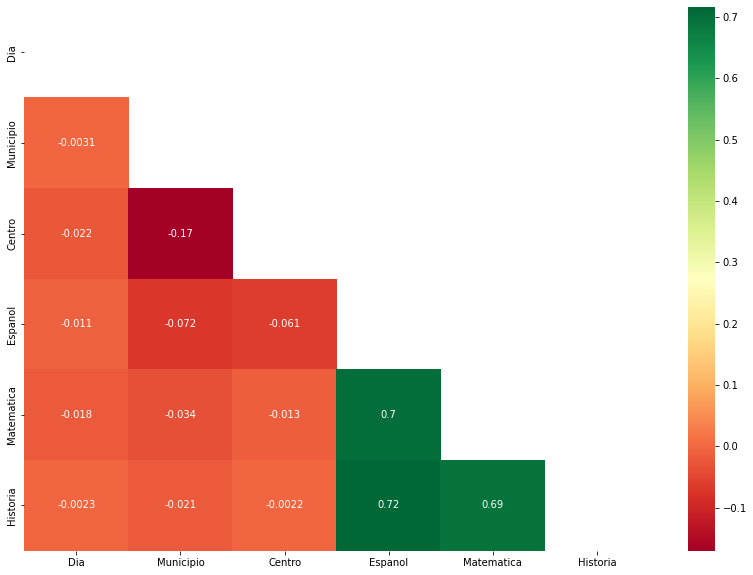

In [ ]:
plt.figure(figsize = (14,10))
mask = np.triu(np.ones_like(dfd.corr()))
sn.heatmap(dfd.corr(),cmap="RdYlGn",mask = mask,annot=True)
plt.show()